In [12]:
# import pandas as pd
# import os
# BASE_DIR = 'att_wts'

# scores = {}

# for vid in os.listdir(BASE_DIR):
#     if 'DS_Store' in vid or '.txt' in vid:
#         continue
#     rouge_path = os.path.join(BASE_DIR, vid, 'rouge.csv')
#     data = pd.read_csv(rouge_path)
#     scores[vid] = data[data['score_type'] == 'rougeL-F']['mid'].values[0]

In [6]:
import json
import os

BASE_DIR = '../'

mod_scores = {}

for fname in os.listdir(BASE_DIR):
    if 'scores' in fname and 'json' in fname:
        mod_name = fname[fname.rfind('_')+1:-5]
        with open(os.path.join(BASE_DIR, fname)) as f:
            mod_scores[mod_name] = json.load(f)

In [9]:
mod_scores.keys()

dict_keys(['vid-only', 'txt-only', 'sotah2', 'sotah3', 'aud-only', 'aud-txt', 'vid-txt'])

In [12]:
import json

durations_path = 'stats/test_durations.json'

with open(durations_path) as f:
    durations = json.load(f)

In [13]:
durations

{'37ZtKNf6Yd8': 72,
 '3ddzkmFPEBU': 69,
 '8kAWy2YodzQ': 87,
 '92V3oH63zbQ': 92,
 'FZCEymcpq7I': 94,
 'FZCF7kPIyOk': 119,
 'FZ_tTg3JQI4': 112,
 'FZd8Iv9ACVw': 104,
 'FZftCNT-Vbw': 174,
 'FZikACPeYpg': 98,
 'FZrU_mEryAs': 61,
 'FZrWOf-oGDk': 69,
 'FZw5BAVpKx4': 78,
 'Fz-N1S0swh8': 68,
 'FzAIlhumvMA': 90,
 'FzMychBC6Xc': 73,
 'FzQPg4aqNYc': 68,
 'FzUdcaxw_vs': 92,
 'FzWvE__PamM': 60,
 'FzaQ-Q5gSmI': 83,
 'Fzj3jz2Imf0': 62,
 'FzoUVr98JmQ': 51,
 'G-0gYel1YA8': 84,
 'G05uFub3YFc': 116,
 'G095RWKQ39g': 143,
 'G0PNAsonBGk': 119,
 'G0Q6AlvH96I': 126,
 'G0Xp4Wj4PrY': 105,
 'G0peUY2cfeE': 72,
 'G0zQm6X8uiQ': 109,
 'G19uBylwQww': 104,
 'G1GUMky8kWc': 76,
 'G1Lht9z3V7o': 111,
 'G1LiGqM3FhM': 87,
 'G1dr4C7dn9w': 65,
 'G1ftM-hqgTk': 65,
 'G1jsDl1mVvk': 61,
 'G1lpeMre7sY': 88,
 'G1nq4fYZiyQ': 67,
 'G1z1RB3pOKM': 171,
 'G21Gx_C18IA': 79,
 'G2Go6a76xd0': 68,
 'G2VzB5-JkRA': 106,
 'G2dND014Ps4': 87,
 'G2hnUeetWcc': 107,
 'G2kVb4gINSI': 82,
 'G2lEchCCRAo': 112,
 'G2sD7N53ju8': 81,
 'G2uKe6hCNSo': 75,
 'G3

In [21]:
mod_names, Xs, ys = [], [], []

for mod_name, scores in mod_scores.items():
    X = []
    y = []
    for vid in scores.keys():
        if vid in durations:
            X.append(durations[vid])
            y.append(scores[vid])
    Xs.append(X)
    ys.append(y)
    mod_names.append(mod_name)

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["xtick.labelsize"] = 'x-large'
plt.rcParams["ytick.labelsize"] = 'x-large'

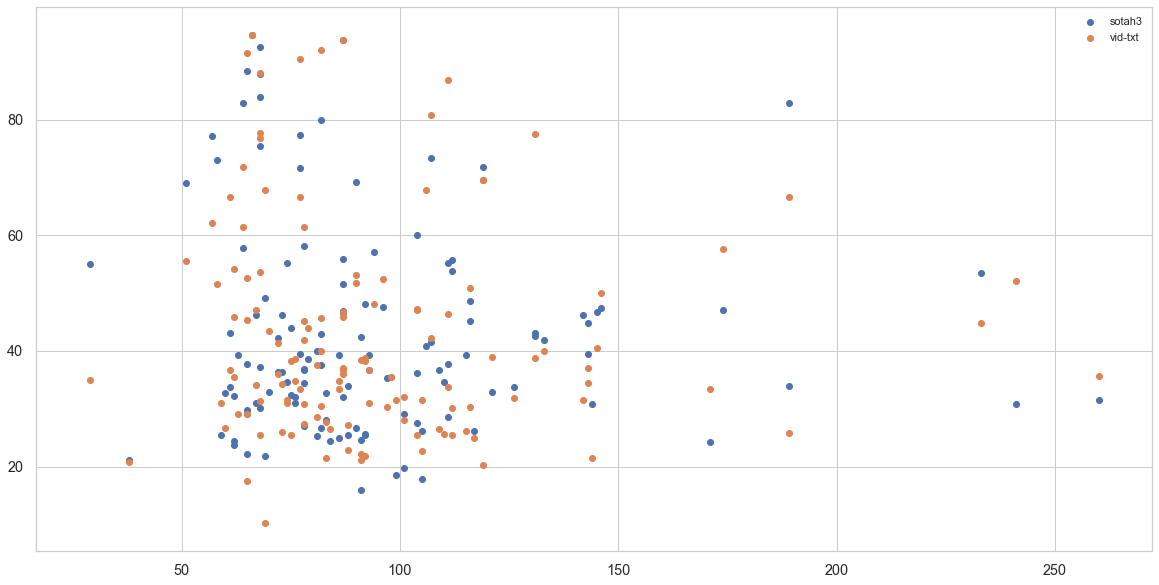

In [171]:
to_plot = ['vid-txt', 'sotah3']

for mod_name, X, y in zip(mod_names, Xs, ys):
    if mod_name not in to_plot:
        continue
    X, y = zip(*sorted(zip(X, y)))
    plt.scatter(X, np.array(y)*100, label=mod_name)
plt.legend()
plt.show()

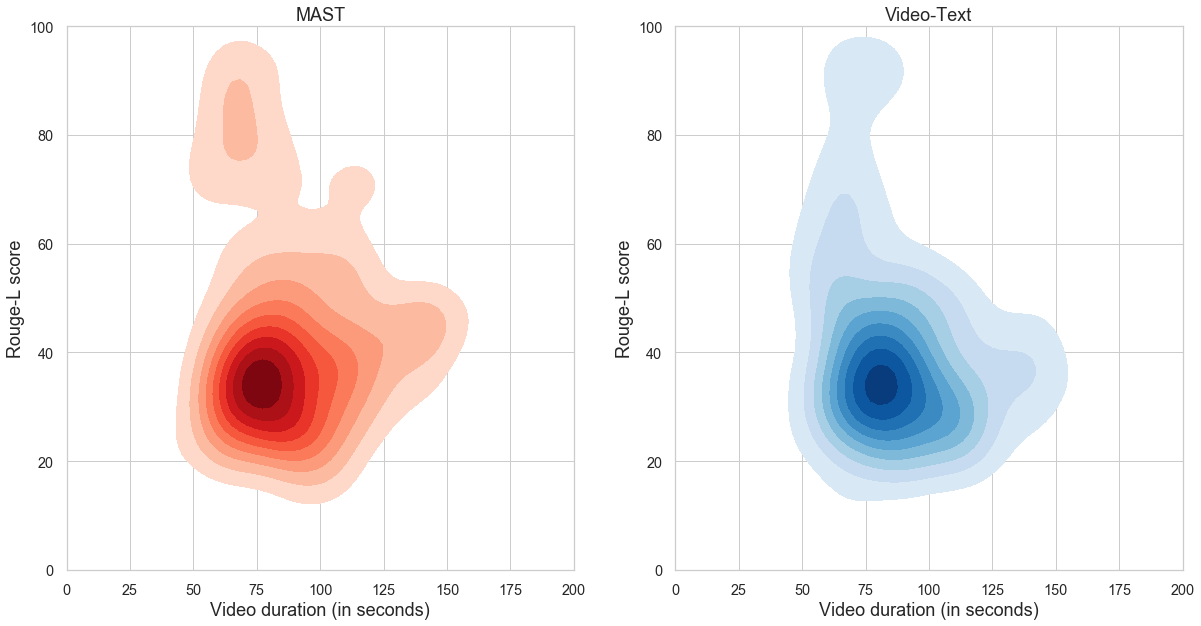

In [172]:
# to_plot = ['vid-txt', 'txt-only', 'sotah3', 'sotah2']
to_plot = ['sotah3', 'vid-txt']

# plt.style.use('seaborn')

sns.set_style(style='whitegrid')

fontsize = 18
f, axes = plt.subplots(1, 2)

for mod_name, X, y in zip(mod_names, Xs, ys):
    if mod_name not in to_plot:
        continue
    X, y = zip(*sorted(zip(X, y)))
    if mod_name == 'sotah3':
        cmap = 'Reds'
        axis = axes[0]
        title = "MAST"
    else:
        cmap = 'Blues'
        axis = axes[1]
        title = "Video-Text"

    sns.kdeplot(np.array(X), np.array(y)*100, shade=True, shade_lowest=False, cmap=cmap, ax=axis)
    axis.set_title(title, fontsize=fontsize)
    axis.set_xlabel('Video duration (in seconds)', fontsize=fontsize)
    axis.set_ylabel('Rouge-L score', fontsize=fontsize)
    axis.set_xlim([0, 200])
    axis.set_ylim([0, 100])

# plt.legend()
plt.show()

In [204]:
# # to_plot = ['vid-txt', 'txt-only', 'sotah3', 'sotah2']
# to_plot = ['sotah3', 'vid-txt']

# # plt.style.use('seaborn')

# sns.set_style(style='whitegrid')

# fontsize = 18
# f, axes = plt.subplots(1, 2)

# for mod_name, X, y in zip(mod_names, Xs, ys):
#     if mod_name not in to_plot:
#         continue
#     X, y = zip(*sorted(zip(X, y)))
#     if mod_name == 'sotah3':
#         cmap = 'Reds'
#         axis = axes[0]
#         title = "MAST"
#     else:
#         cmap = 'Blues'
#         axis = axes[1]
#         title = "Video-Text"

#     sns.kdeplot(np.array(X), np.array(y)*100, shade=True, shade_lowest=False, cmap=cmap, ax=axis)
#     axis.set_title(title, fontsize=fontsize)
#     axis.set_xlabel('Video duration (in seconds)', fontsize=fontsize)
#     axis.set_ylabel('Rouge-L score', fontsize=fontsize)
#     axis.set_xlim([0, 200])
#     axis.set_ylim([0, 100])

# # plt.legend()
# plt.show()

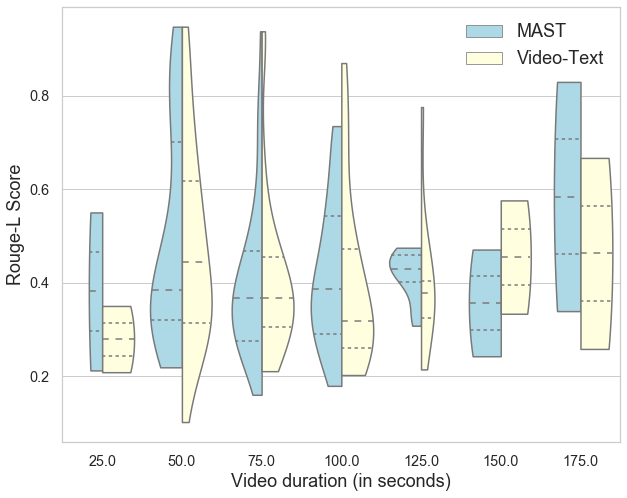

In [314]:
# to_plot = ['vid-txt', 'txt-only', 'sotah3', 'sotah2']
to_plot = ['sotah3', 'vid-txt']

sns.set_style(style='whitegrid')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["legend.loc"] = 'center'

# fontsize = 18
# f, axes = plt.subplots(1, 2)

combined_X, combined_y = np.array([]), np.array([])
combined_hue = np.array([])

for mod_name, X, y in zip(mod_names, Xs, ys):
    if mod_name not in to_plot:
        continue

    X = np.array(X)
    y = np.array(y)
    
    y = y[X < 200]
    X = X[X < 200]
        
    combined_X = np.append(combined_X, X)
    combined_y = np.append(combined_y, y)
    
    if mod_name == 'sotah3':
        hue = ['MAST'] * len(X)
    else:
        hue = ['Video-Text'] * len(X)
    combined_hue = np.append(combined_hue, np.array(hue))


interval = 25

X = (np.array(combined_X)//interval) * interval
y = np.array(combined_y)
hue = combined_hue

sns.violinplot(X, y, inner='quartile', split=True, hue=hue, palette=['lightblue', 'lightyellow'],
               saturation=1, cut=0)

fontsize = 18
plt.legend(loc=0, fontsize=fontsize)
plt.xlabel('Video duration (in seconds)', fontsize=fontsize)
plt.ylabel('Rouge-L Score', fontsize=fontsize)
# plt.xlim([10, 200])
# plt.ylim([0, 1])
plt.show()

Text(0, 0.5, 'Density')

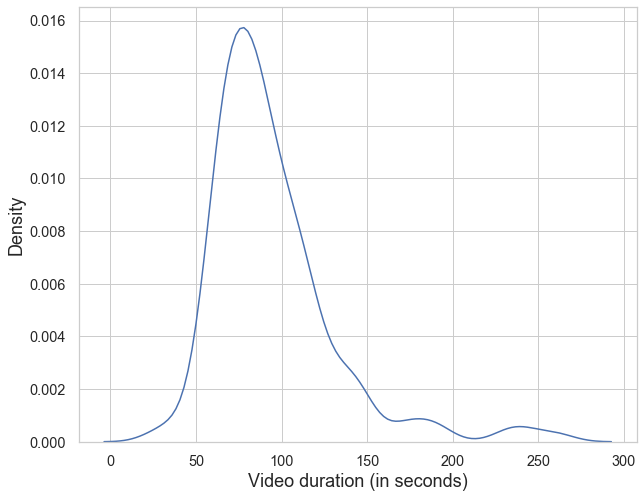

In [298]:
plt.rcParams["figure.figsize"] = (10,8)

sns.kdeplot(Xs[0])
plt.xlabel('Video duration (in seconds)', fontsize=fontsize)
plt.ylabel('Density', fontsize=fontsize)

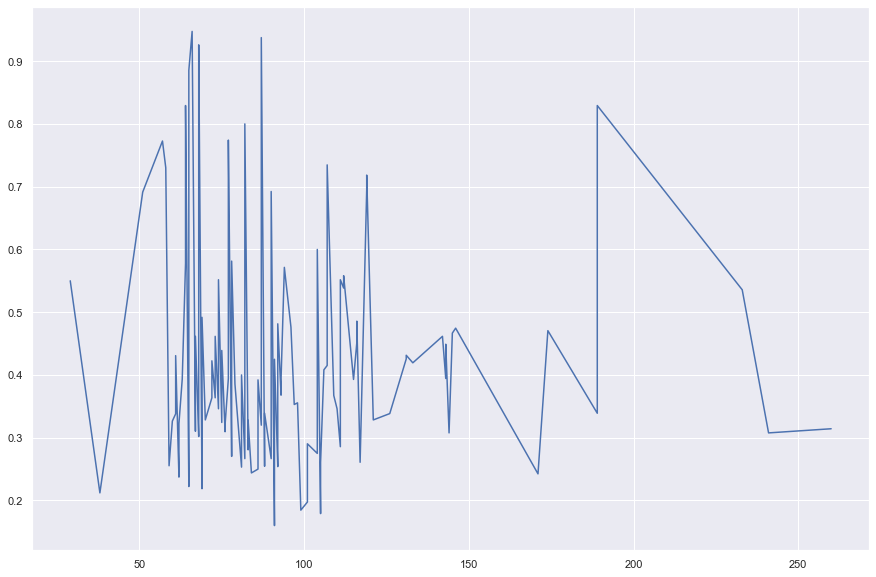

In [23]:
plt.plot(X, y)

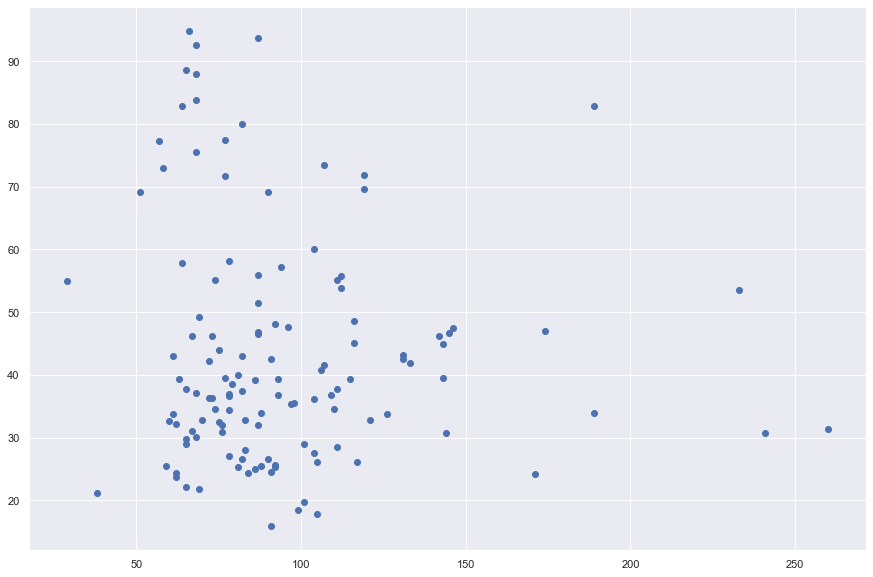

In [36]:
plt.scatter(X, np.array(y)*100)

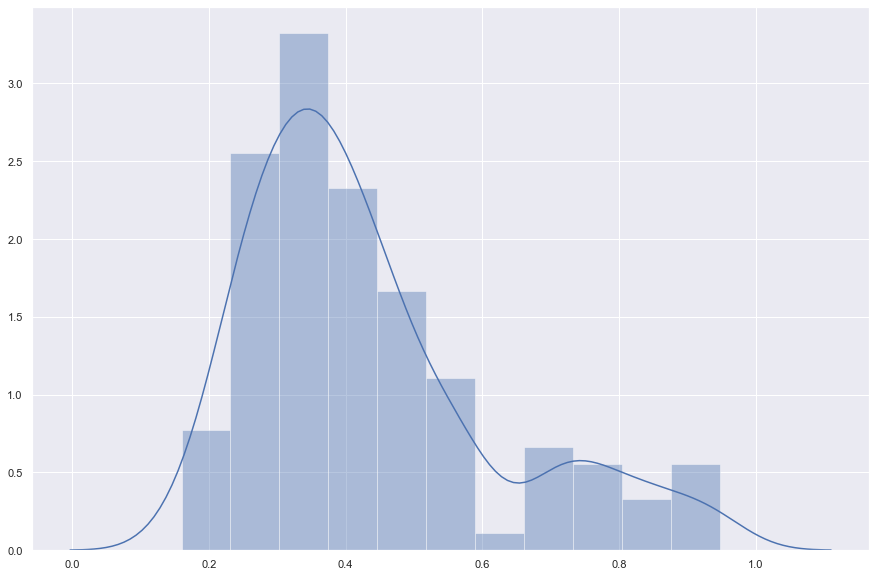

In [34]:
import numpy as np

# sns.kdeplot(np.array(X), shade=True, label='Durations')
sns.distplot(np.array(y), label='Rouge-L F scores')

In [129]:
scores = mod_scores['sotah3']

In [141]:
X = []
y = []
vids = []
for vid in scores.keys():
    if vid in durations:
        X.append(durations[vid])
        y.append(scores[vid])
        vids.append(vid)

In [146]:
X = np.array(X)
y = np.array(y)
vids = np.array(vids)

X1 = X[X >= 60]
y1 = y[X >= 60]
vids1 = vids[X >= 60]

print(X1[y1>=0.7])
print(y1[y1>=0.7])
print(vids1[y1>=0.7])

# print(X)
# print(y)

[ 77 119  65  68  82  77  68 189  64  66  68  68 107  87]
[0.774194 0.718447 0.885246 0.83871  0.8      0.716981 0.88     0.829268
 0.829268 0.947368 0.925926 0.754717 0.734694 0.9375  ]
['fzcsY2gm7t0' 'G0PNAsonBGk' 'g1xdqxCZxTg' 'G3EE6yhl1vk' 'g2eTD-1Jcro'
 'fZgbCwSG3Hc' 'Fz-N1S0swh8' 'g0yUlOaqL6k' 'G3EfBFwsOpE' 'G3di9jJTqDs'
 'FzQPg4aqNYc' 'f_zna_wG3zo' 'fzncPNr2Sc0' 'G1LiGqM3FhM']


In [ ]:
max_vid = 'G0PNAsonBGk'

### Video wise Content-F1

In [151]:
video_ids = ['fzXgYPSnaDs', 'g0QHEtNjZhI', 'g3sLd8JupoQ', 'fzcsY2gm7t0', 'FzMychBC6Xc', 'FZrU_mEryAs', 'G38DbiHHTW0', 'FZw5BAVpKx4', 'G3qZW-hZXaQ', 'g2QdwYqm8pg', 'G3bMqicS4bQ', '92V3oH63zbQ', 'g0pRnlPR-K0', 'G0PNAsonBGk', 'g1xdqxCZxTg', 'g3ZgF8gdfLo', 'g2NA_eBUcH8', 'FZikACPeYpg', '_G0RrDVpOZ4', 'G2hnUeetWcc', '_g0fpC8aiME', '3ddzkmFPEBU', 'G3OMdQo1zjY', 'g27MVuMkWs4', 'G2dND014Ps4', 'g0UUmEkoT1w', 'FzAIlhumvMA', 'G2sD7N53ju8', 'g3BsH_C3u7Y', 'G2kVb4gINSI', 'g3pXM5X3_Xw', 'G19uBylwQww', 'G0Q6AlvH96I', 'g0TkUiO7t4I', 'G3EE6yhl1vk', 'G2lEchCCRAo', 'G1z1RB3pOKM', 'G095RWKQ39g', 'fZgWKh3ENoE', 'fZIHe3dXPR0', 'fzOH00UZg84', 'G2Go6a76xd0', 'g3X3XE6M2_A', 'g1e-zO8mZ4c', 'G3k86AVFwVs', 'fZq8wTAYtmw', 'g0jX0TI-QMw', 'g0nKtxuNSTw', 'G2VzB5-JkRA', 'g2o-GFdGOJE', 'G3VM7etNABI', 'g3wQOQH1vyE', 'g2wUCRRni28', 'g2ur4BIuN0Q', 'g3kFAmcBpFc', 'G23G21G49dk', 'G1nq4fYZiyQ', 'fzQ2E3_xBZA', 'FZ_tTg3JQI4', 'g2eTD-1Jcro', 'fZgbCwSG3Hc', 'G33aqW3DLpc', 'Fz-N1S0swh8', 'fZVsIwz_yhg', 'g1HXoDkax5A', 'fzm-AzP1GHo', 'g1ccEYTMGGY', 'g1z6HOJ0yRw', 'FZrWOf-oGDk', 'G1Lht9z3V7o', 'FzUdcaxw_vs', 'g0yUlOaqL6k', 'G3EfBFwsOpE', 'G3di9jJTqDs', 'fzXsxNFczRA', 'G05uFub3YFc', 'FzQPg4aqNYc', 'g0iNy-yPisM', 'g0S7FAqIweA', 'g05yGRoZE10', 'FZCEymcpq7I', 'g3UE1iPiyuE', 'FZCF7kPIyOk', 'G1dr4C7dn9w', 'G3gm_C5UueQ', 'G1GUMky8kWc', 'G0zQm6X8uiQ', 'fzueHkUDyhE', 'g3ushtMfLiY', 'g3DkYITeIy0', 'G0peUY2cfeE', 'G2uKe6hCNSo', 'FzaQ-Q5gSmI', 'G1jsDl1mVvk', 'f_zna_wG3zo', 'Fzj3jz2Imf0', 'G3EYpadwqck', 'g38AmwPAYvg', 'FZd8Iv9ACVw', '_G0MZFLIHa0', 'fZK9hW81XCU', 'g2ELiaFjKfs', 'FzWvE__PamM', 'g1uA0f9I0Sg', 'FZftCNT-Vbw', 'g0Abwige7MQ', 'G0Xp4Wj4PrY', 'G-0gYel1YA8', '_FzvMVnR_aU', 'G21Gx_C18IA', 'g2SdWBPoXZ0', 'g1HvmBOR7Y4', 'fZM3IcM2Xs4', 'G3FhmHz_7hs', '_fZbAxSSbX4', 'G1ftM-hqgTk', '8kAWy2YodzQ', 'g1vUH8Iy4vw', 'FzoUVr98JmQ', 'g3V0BsmDUgY', 'fzncPNr2Sc0', 'G3HKHxevpFI', 'G1LiGqM3FhM', 'G1lpeMre7sY', 'fzz1bxvAz4k', 'fzegqlecOD8', '37ZtKNf6Yd8']

sota_h3_scores = [0.4, 0.15384615384615385, 0.3333333333333333, 0.8, 0.5714285714285714, 0.3333333333333333, 0.6666666666666666, 0.42857142857142855, 0.4, 0.3333333333333333, 0.3333333333333333, 0.25, 0.5, 0.5, 0.75, 0.3333333333333333, 0.3111111111111111, 0.3333333333333333, 0.6333333333333333, 0.5, 0.125, 0.1111111111111111, 0.5599999999999999, 0.06666666666666667, 0.4, 0.2, 0.5, 0.3333333333333333, 0.25, 0.25, 0.3333333333333333, 0.14285714285714285, 0.3333333333333333, 0.4, 0.75, 0.75, 0.3333333333333333, 0.25, 0.96, 1.0, 0.4, 0.2857142857142857, 0.5599999999999999, 0.2857142857142857, 0.3333333333333333, 0.25, 0.2222222222222222, 0.26, 0.3333333333333333, 0.2857142857142857, 0.42857142857142855, 0.3333333333333333, 0.5599999999999999, 0.25, 0.2, 0.22499999999999998, 0.25, 0.42857142857142855, 0.375, 0.25, 1.0, 0.4, 1.0, 0.2222222222222222, 0.125, 0.3333333333333333, 0.2222222222222222, 0.25, 0.3333333333333333, 0.2, 0.2, 1.0, 0.3333333333333333, 0.75, 1.0, 0.2857142857142857, 0.6, 0.2, 0.5, 0.6, 0.3, 0.25, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.14285714285714285, 0.3333333333333333, 0.25, 0.5, 0.2857142857142857, 1.0, 0.1, 0.75, 0.6, 0.25, 0.16666666666666666, 0.5, 0.2, 0.375, 0.16666666666666666, 0.7666666666666666, 0.1111111111111111, 0.16666666666666666, 0.5714285714285714, 0.6, 0.7, 0.4, 0.5, 0.42857142857142855, 0.125, 0.5, 0.25, 0.2, 0.42857142857142855, 0.14285714285714285, 0.4, 0.6666666666666666, 0.625, 0.5, 0.25, 0.4, 0.75, 0.2857142857142857, 0.5, 0.6666666666666666, 0.4]

vid_txt_scores = [0.14285714285714285, 0.23076923076923078, 0.6666666666666666, 0.6, 0.14285714285714285, 0.5, 0.6666666666666666, 0.2857142857142857, 0.1111111111111111, 0.3333333333333333, 0.6666666666666666, 0.25, 0.5, 0.25, 0.75, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.5, 0.375, 0.2, 0.2, 0.2, 0.4, 0.4, 0.3333333333333333, 0.3333333333333333, 0.125, 0.3833333333333333, 0.3333333333333333, 0.14285714285714285, 0.3333333333333333, 0.4, 0.75, 0.25, 0.16666666666666666, 0.25, 0.6, 1.0, 0.4, 0.2857142857142857, 0.5599999999999999, 0.14285714285714285, 0.46666666666666656, 0.3333333333333333, 0.3333333333333333, 0.2, 0.3333333333333333, 0.2571428571428572, 0.5714285714285714, 0.12000000000000002, 0.2, 0.25, 0.2, 0.125, 0.125, 0.42857142857142855, 0.25, 0.25, 1.0, 0.4, 1.0, 0.3333333333333333, 0.375, 0.3333333333333333, 0.2222222222222222, 0.44999999999999996, 0.3333333333333333, 0.3, 0.2, 0.6666666666666666, 0.3333333333333333, 0.75, 1.0, 0.14285714285714285, 0.2, 0.2, 0.5, 0.4, 0.21666666666666667, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.2857142857142857, 0.3333333333333333, 0.25, 0.5, 0.2857142857142857, 1.0, 0.27999999999999997, 0.75, 0.6, 0.35, 0.3333333333333333, 0.2, 0.2, 0.375, 0.3333333333333333, 0.46666666666666656, 0.1111111111111111, 0.16666666666666666, 0.42857142857142855, 0.52, 0.7, 0.3, 0.5, 0.42857142857142855, 0.25, 0.16666666666666666, 0.5, 0.2, 0.42857142857142855, 0.2571428571428572, 0.1111111111111111, 0.6666666666666666, 0.375, 0.375, 0.25, 0.4, 0.75, 0.42857142857142855, 0.5, 0.3333333333333333, 0.6]

In [162]:
for vid, mast, vt in zip(video_ids, sota_h3_scores, vid_txt_scores):
    if mast - vt >= 0.2:
        print('{}, {:.3f}, {:.3f}'.format(vid, vt, mast))

fzXgYPSnaDs, 0.143, 0.400
fzcsY2gm7t0, 0.600, 0.800
FzMychBC6Xc, 0.143, 0.571
G3qZW-hZXaQ, 0.111, 0.400
G0PNAsonBGk, 0.250, 0.500
_G0RrDVpOZ4, 0.167, 0.633
G3OMdQo1zjY, 0.200, 0.560
G2lEchCCRAo, 0.250, 0.750
fZgWKh3ENoE, 0.600, 0.960
g3wQOQH1vyE, 0.120, 0.333
g2wUCRRni28, 0.200, 0.560
g0yUlOaqL6k, 0.667, 1.000
FzQPg4aqNYc, 0.200, 0.600
g38AmwPAYvg, 0.200, 0.500
g2ELiaFjKfs, 0.467, 0.767
g1HvmBOR7Y4, 0.167, 0.500
8kAWy2YodzQ, 0.111, 0.400
FzoUVr98JmQ, 0.375, 0.625
fzegqlecOD8, 0.333, 0.667


In [263]:
base_path = 'att_wts'

for vid, mast, vt in zip(video_ids, sota_h3_scores, vid_txt_scores):
    if mast - vt >= 0.2:
        print('{}, {:.3f}, {:.3f}'.format(vid, vt, mast))
        with open(os.path.join(base_path, vid, 'hyp.txt')) as f:
            hyp = f.readlines()
            print('HYP: {}'.format(hyp))
        with open(os.path.join(base_path, vid, 'ref.txt')) as f:
            ref = f.readlines()
            print('ref: {}\n\n'.format(ref))

fzXgYPSnaDs, 0.143, 0.400
HYP: ['maggots are good for catching perch . learn more about ice fishing bait in this ice fishing lesson from an experienced fisherman .']
ref: ['use several maggots on a hook when ice fishing . learn more tips for baiting hooks in this ice fishing lesson from an experienced fisherman .']


fzcsY2gm7t0, 0.600, 0.800
HYP: ['how the organization of love with a mural painting project ; learn this and more in this free online painting video about wall murals taught by expert artist ian loveall .']
ref: ["how composition controls the flow of the viewer 's experience with your wall mural ; learn this and more in this free online painting video about wall murals taught by expert artist ian loveall ."]


FzMychBC6Xc, 0.143, 0.571
HYP: ['so you want to learn to play music but not sure which of the neck . learn how to play a guitar equipment in this free video music lesson from a professional musician .']
ref: ['so you want to learn to play music but not sure which of 

In [267]:
transcript = "let ’ s talk now about how to bait a tip up hook with a maggot . typically , you 're going to be using this for pan fish . not a real well known or common technique but on a given day it could be the difference between not catching fish and catching fish . all you do , you take your maggot , you can use meal worms , as well , which are much bigger , which are probably more well suited for this because this is a rather large hook . you would just , again , put that hook right through the maggot . with a big hook like this , i would probably put ten of these on it , just line the whole thing . this is going to be more of a technique for pan fish , such as , perch and sunfish , some of your smaller fish but if you had maggots , like this , or a meal worm , or two , on a hook like this , this would be a fantastic setup for trout , as well ."

txt_only = "ice fishing is used for ice fishing . learn about ice fishing bait with tips from an experienced fisherman artist in this free fishing video ."
vid_txt = "learn about the ice fishing bait in this ice fishing lesson from an experienced fisherman ."
mast = "maggots are good for catching perch . learn more about ice fishing bait in this ice fishing lesson from an experienced fisherman ."

In [268]:
transcript_words = set(['the', 'to', 'and', 'you', 'a', 'it', 'that', 'of', 'is', 'i', 'going', 'we', 'in', 'your', 'this', "'s", 'so', 'on'])

summary_words = set(['in', 'a', 'this', 'to', 'free', 'the', 'video', 'and', 'learn', 'from', 'on', 'with', 'how', 'tips', 'for', 'of', 'expert', 'an'])

In [286]:
def filter_line(line, stopwords):
    line = line.split()
    words = []
    for word in line:
        if word in stopwords:
            words.append("\textcolor{red}{" + "{}".format(word) + "}")
        else:
            words.append(word)
    filtered_line = ' '.join(words)
    return filtered_line

In [292]:
filter_line(transcript, transcript_words)

"let ’ s talk now about how \textcolor{red}{to} bait \textcolor{red}{a} tip up hook with \textcolor{red}{a} maggot . typically , \textcolor{red}{you} 're \textcolor{red}{going} \textcolor{red}{to} be using \textcolor{red}{this} for pan fish . not \textcolor{red}{a} real well known or common technique but \textcolor{red}{on} \textcolor{red}{a} given day \textcolor{red}{it} could be \textcolor{red}{the} difference between not catching fish \textcolor{red}{and} catching fish . all \textcolor{red}{you} do , \textcolor{red}{you} take \textcolor{red}{your} maggot , \textcolor{red}{you} can use meal worms , as well , which are much bigger , which are probably more well suited for \textcolor{red}{this} because \textcolor{red}{this} \textcolor{red}{is} \textcolor{red}{a} rather large hook . \textcolor{red}{you} would just , again , put \textcolor{red}{that} hook right through \textcolor{red}{the} maggot . with \textcolor{red}{a} big hook like \textcolor{red}{this} , \textcolor{red}{i} would pro

In [293]:
filter_line(txt_only, summary_words)

'ice fishing is used \textcolor{red}{for} ice fishing . \textcolor{red}{learn} about ice fishing bait \textcolor{red}{with} \textcolor{red}{tips} \textcolor{red}{from} \textcolor{red}{an} experienced fisherman artist \textcolor{red}{in} \textcolor{red}{this} \textcolor{red}{free} fishing \textcolor{red}{video} .'

In [294]:
filter_line(vid_txt, summary_words)

'\textcolor{red}{learn} about \textcolor{red}{the} ice fishing bait \textcolor{red}{in} \textcolor{red}{this} ice fishing lesson \textcolor{red}{from} \textcolor{red}{an} experienced fisherman .'

In [295]:
filter_line(mast, summary_words)

'maggots are good \textcolor{red}{for} catching perch . \textcolor{red}{learn} more about ice fishing bait \textcolor{red}{in} \textcolor{red}{this} ice fishing lesson \textcolor{red}{from} \textcolor{red}{an} experienced fisherman .'